In [1]:
# Importar Frameworks
import pandas as pd
import numpy as np

# Libs para análises gráficas
import matplotlib.pyplot as plt
import seaborn as sns

# Função para gerar dados sinteticos para nosso case
from pyod.utils.data import generate_data

In [2]:
# Gerar dados aleatórios com 2 eixos
Dados_X, Dados_Y = generate_data( n_train=1000, train_only=True, n_features=2 )

# Seprar os valores em 2 eixo e ajustar o eixo
Eixo_X = Dados_X[:,[0] ].reshape(-1, 1)
Eixo_Y = Dados_X[:,[1] ].reshape(-1, 1)

# Criar uma Tabela
Tabela = pd.DataFrame( Eixo_X, columns=['Eixo X'] )
Tabela['Eixo Y'] = Eixo_Y
Tabela['Classe'] = Dados_Y

# Verificando
Tabela.head()

,Eixo X,Eixo Y,Classe
0,2.434268,2.245367,0.0
1,1.726149,3.007705,0.0
2,1.447073,1.290649,0.0
3,4.206384,1.168096,0.0
4,2.192630,1.575621,0.0


In [3]:
# Divisão dos Outliers
Tabela.Classe.value_counts( normalize=True ) * 100

Classe
0.0    90.0
1.0    10.0
Name: proportion, dtype: float64

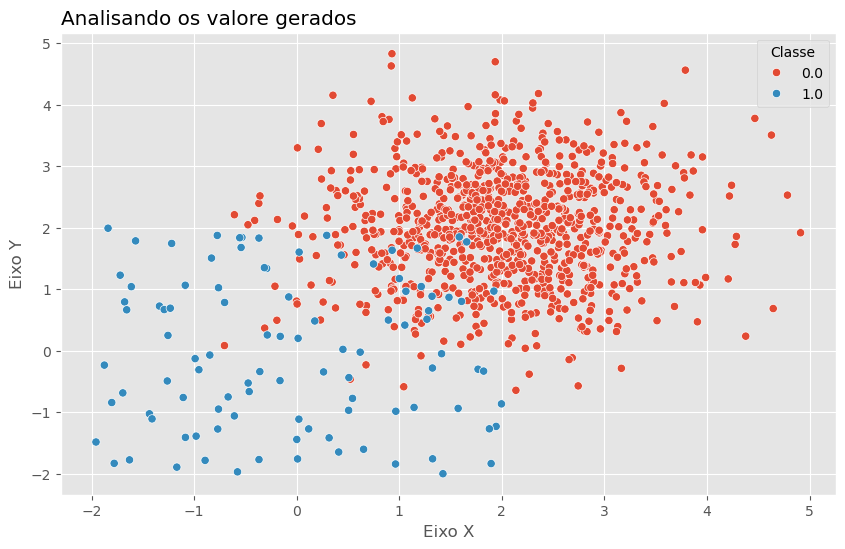

In [4]:
# Estilo
plt.style.use('ggplot')

# Tamanho da imagem
plt.figure( figsize=(10, 6) )

# Titulo do grafico
plt.title('Analisando os valore gerados', loc='left')

# Plot com os parametros
sns.scatterplot( data=Tabela, x='Eixo X', y='Eixo Y', hue='Classe' );

In [5]:
# Estatísticos
Tabela.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Eixo X,1000.0,1.808070,1.107594,-1.957428,1.217428,1.910774,2.545177,4.911458
Eixo Y,1000.0,1.797335,1.109297,-1.997120,1.171608,1.898736,2.547863,4.827064
Classe,1000.0,0.100000,0.300150,0.000000,0.000000,0.000000,0.000000,1.000000


C:\Users\emers\AppData\Local\Temp\ipykernel_15680\1115074432.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot( data=Tabela, y='Eixo Y', width=0.35, palette='husl')
C:\Users\emers\AppData\Local\Temp\ipykernel_15680\1115074432.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot( data=Tabela, y='Eixo X', width=0.35, palette='husl')


<Axes: title={'left': 'Analisando a Coluna X'}, ylabel='Eixo X'>

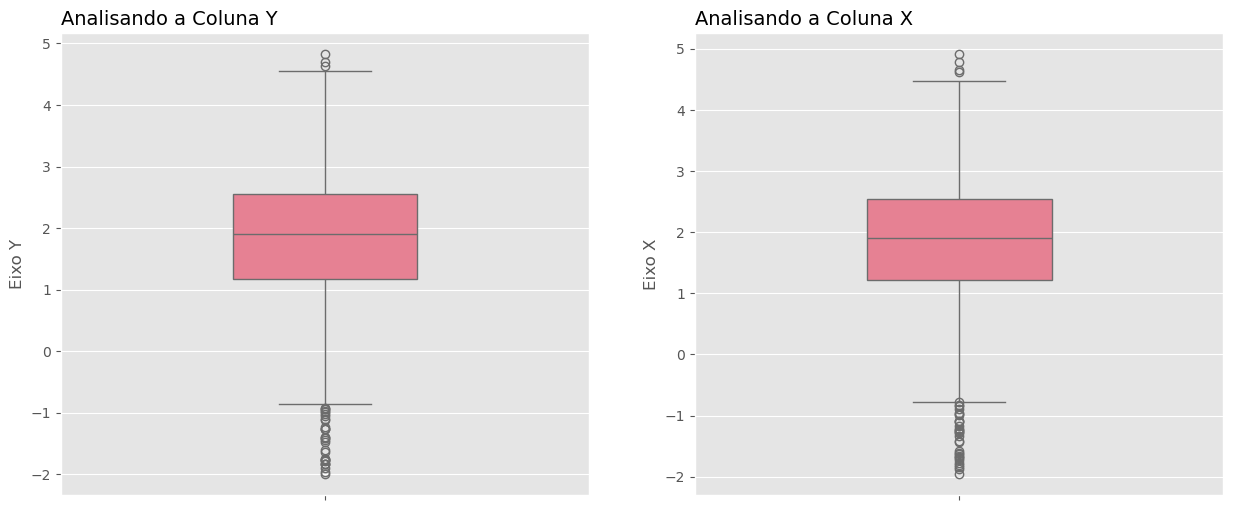

In [6]:
# Grid com 2 plots

# Tamanho 
plt.figure( figsize=(15, 6) )

# Grid 1
plt.subplot(1, 2, 1)
# Plot
plt.title('Analisando a Coluna Y', loc='left', fontsize=14)
sns.boxplot( data=Tabela, y='Eixo Y', width=0.35, palette='husl')

# Grid 2
plt.subplot(1, 2, 2)
# Plot
plt.title('Analisando a Coluna X', loc='left', fontsize=14)
sns.boxplot( data=Tabela, y='Eixo X', width=0.35, palette='husl')

In [7]:
# Fazer os calculos para extrair os Outliers

# Calcular o 1ª Quartil - q1
Q1 = np.percentile( Tabela['Eixo X'], 25, interpolation='midpoint')

# Calcular o 3ª Quartil - q3
Q3 = np.percentile( Tabela['Eixo X'], 75, interpolation='midpoint')

# Intervalo do Quartil
IQR = Q3 - Q1

print(f'Primeiro quartil {Q1}')
print(f'Terceiro quartil {Q3}')
print(f'Intervalo quartil {IQR}')

Primeiro quartil 1.217031877785861
Terceiro quartil 2.547279630477682
Intervalo quartil 1.330247752691821


In [8]:
# Verificar os valores que serão "excluidos"

Superior = Tabela['Eixo X'] >= Q3 + 1.5 * IQR # Extremidade superior
Inferior = Tabela['Eixo X'] <= Q1 - 1.5 * IQR # Extremidade inferior

print('Valores que são Outliers (Index)')
print( np.where(Superior) )
print( np.where(Inferior) )

Valores que são Outliers (Index)
(array([ 61, 490, 763, 896], dtype=int64),)
(array([900, 902, 904, 907, 909, 920, 926, 927, 932, 940, 942, 946, 948,
       951, 955, 957, 961, 966, 967, 971, 975, 979, 980, 983, 986, 992,
       993, 994, 997, 999], dtype=int64),)


In [9]:
# Aplicação

# Formulas
Maior = Q3 + 1.5 * IQR
Menor = Q1 - 1.5 * IQR

# Identificando os registros
Dados_Superiores = np.where( Tabela['Eixo X'] >= Maior )
Dados_Inferiores = np.where( Tabela['Eixo X'] <= Menor )


# Mostrando
print(f'Serão retirados { Dados_Superiores[0].shape } registros pois são maiores que o "Q3 - Maior" ')
print(f'Serão retirados { Dados_Inferiores[0].shape } registros pois são menores que o "Q1 - Menor" ')

# Criando uma nova base e retirando os valores 
Nova_Base = Tabela.drop( Dados_Superiores[0] )
Nova_Base = Tabela.drop( Dados_Inferiores[0] )

Nova_Base

Serão retirados (4,) registros pois são maiores que o "Q3 - Maior" 
Serão retirados (30,) registros pois são menores que o "Q1 - Menor" 


,Eixo X,Eixo Y,Classe
0,2.434268,2.245367,0.0
1,1.726149,3.007705,0.0
2,1.447073,1.290649,0.0
3,4.206384,1.168096,0.0
4,2.192630,1.575621,0.0
...,...,...,...
990,0.175435,0.484621,1.0
991,1.656985,1.769884,1.0
995,0.020554,-1.110628,1.0
996,0.408733,-1.644585,1.0


In [10]:
print(f'Antes havia { Tabela.shape[0] } registros')
print(f'Agora há { Nova_Base.shape[0] } registros')
print(f'Foram retirados {Tabela.shape[0] - Nova_Base.shape[0] } registros')

Antes havia 1000 registros
Agora há 970 registros
Foram retirados 30 registros


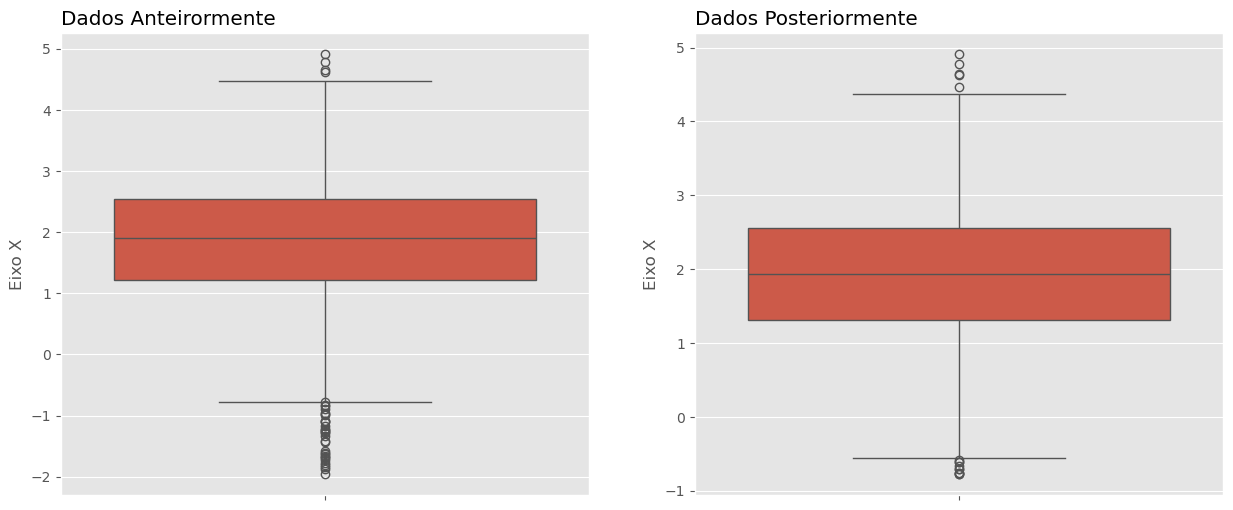

In [14]:
# Tamanho 
plt.figure( figsize=(15, 6) )

# Grid 1
plt.subplot(1, 2, 1)
plt.title('Dados Anteirormente', loc='left')
sns.boxplot( data=Tabela, y='Eixo X')

# Grid 2
plt.subplot(1, 2, 2)
plt.title('Dados Posteriormente', loc='left')
sns.boxplot( data=Nova_Base, y='Eixo X');